In [1]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

from src.testers import ScalarPolarTester, ScalarCartesianTester
from src.testers import polar_gaussian, polar_step, polar_exp, polar_logstep, polar_rsq

%load_ext autoreload
%autoreload 2

Compare Cartesian solution against its computed reference:

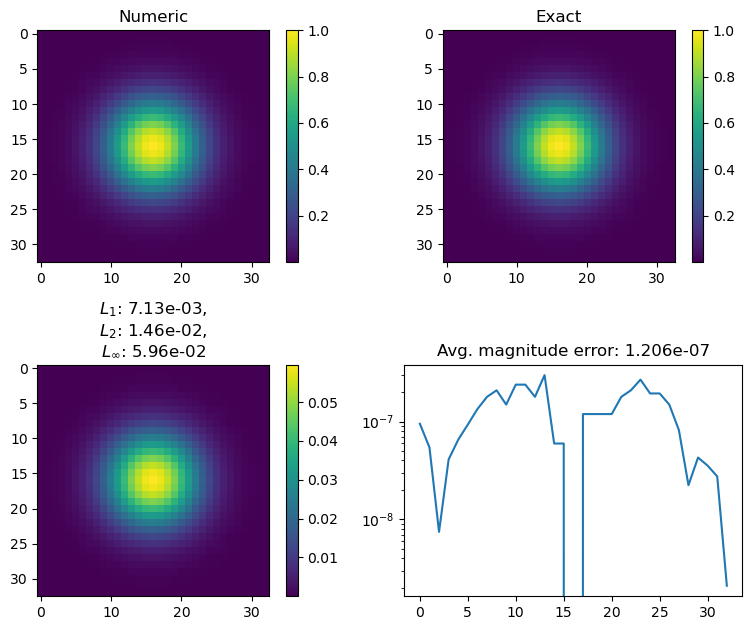

In [2]:
N = 32 + 1

Ec_ref, Ec_num = ScalarCartesianTester.eval_error(N, polar_gaussian, plot=True)[1:]

Compare polar solution against its computed reference:

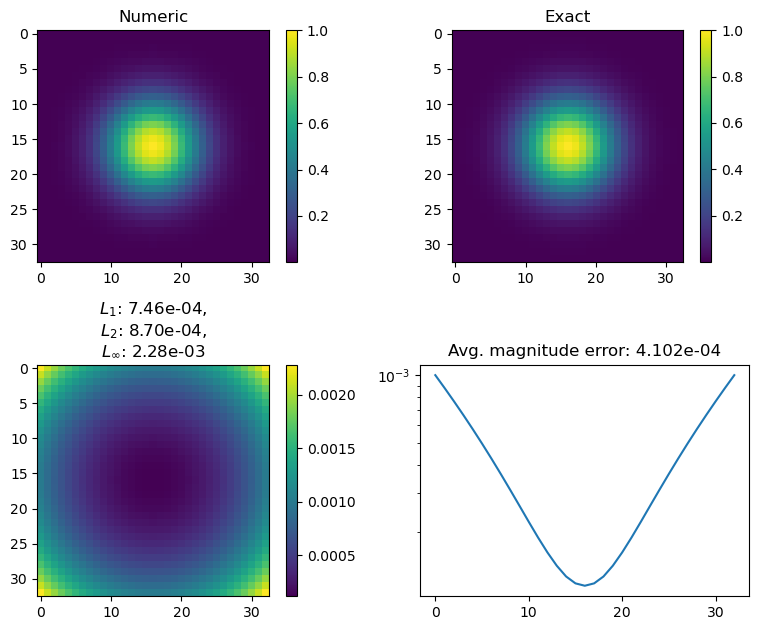

In [3]:
Ep_ref, Ep_num = ScalarPolarTester.eval_error(N, polar_gaussian, plot=True)[1:]

Compare polar and Cartesian solutions directly:

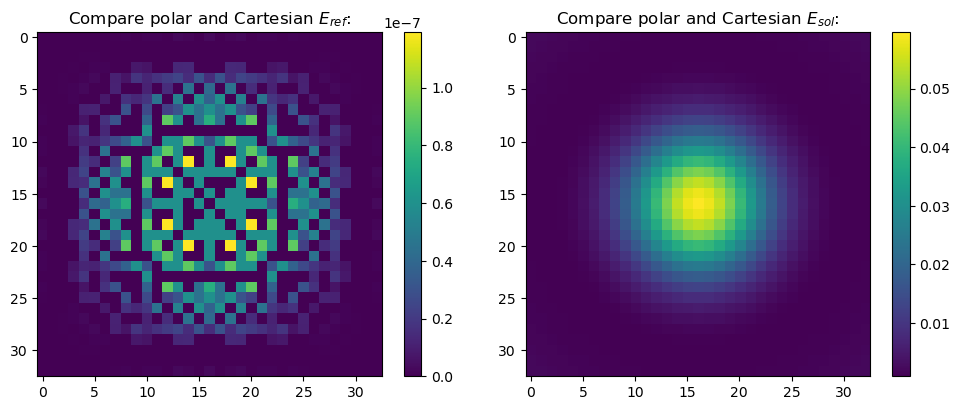

In [4]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

Convergence plots for various test functions:

100%|██████████| 20/20 [00:00<00:00, 150.11it/s]


100%|██████████| 20/20 [00:00<00:00, 166.53it/s]


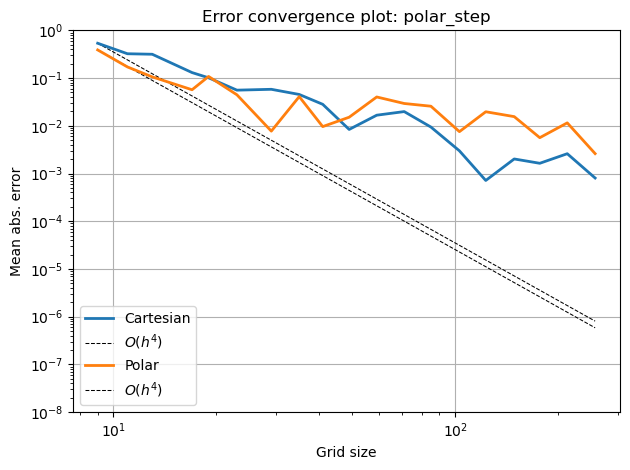

In [17]:
ScalarCartesianTester.plot_convergence(polar_step)
ScalarPolarTester    .plot_convergence(polar_step)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:06<00:00,  3.31it/s]


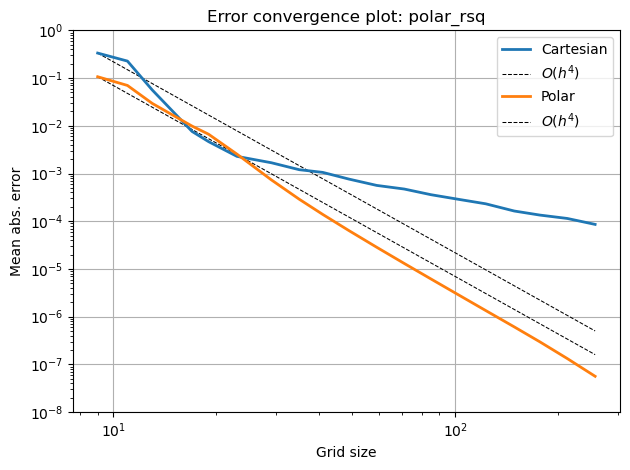

In [18]:
ScalarCartesianTester.plot_convergence(polar_rsq)
ScalarPolarTester    .plot_convergence(polar_rsq)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:05<00:00,  3.50it/s]


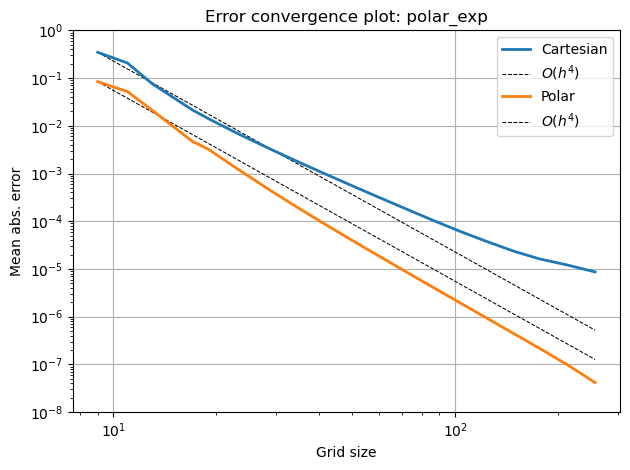

In [19]:
ScalarCartesianTester.plot_convergence(polar_exp)
ScalarPolarTester    .plot_convergence(polar_exp)

 95%|█████████▌| 19/20 [00:00<00:00, 183.50it/s]

100%|██████████| 20/20 [00:00<00:00, 220.08it/s]


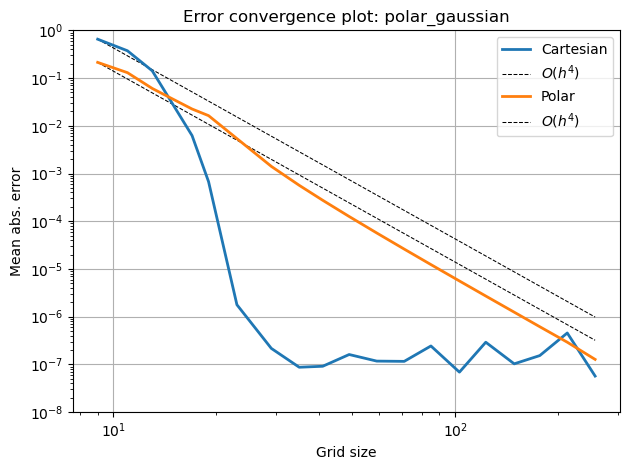

In [20]:
ScalarCartesianTester.plot_convergence(polar_gaussian)
ScalarPolarTester    .plot_convergence(polar_gaussian)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 170.98it/s]


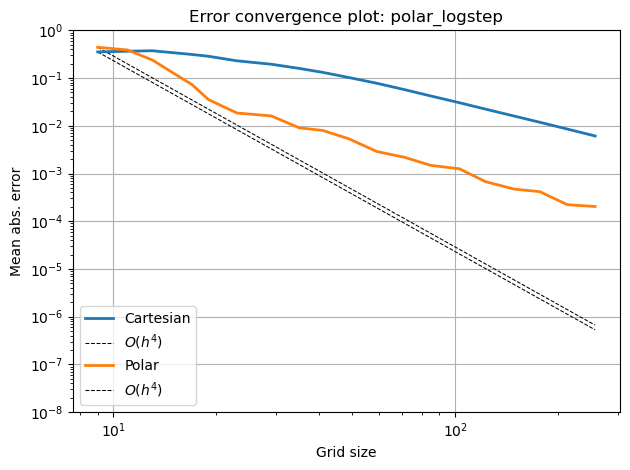

In [21]:
ScalarCartesianTester.plot_convergence(polar_logstep)
ScalarPolarTester    .plot_convergence(polar_logstep)